<a href="https://colab.research.google.com/github/hisyamhilmiomar/algoTradingStrat/blob/main/Linear_Regression_Model_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import datetime as dt

In [ ]:
#Get data for SPY and GOOG

stocks = ["GOOG","SPY"]
start = dt.date.today() - dt.timedelta(365)

In [ ]:
data = yf.download(stocks, start)["Close"]
data.head()

[*********************100%%**********************]  2 of 2 completed


Ticker,GOOG,SPY
Date,,
2023-05-25,124.349998,414.649994
2023-05-26,125.430000,420.019989
2023-05-30,124.639999,420.179993
2023-05-31,123.370003,417.850006
2023-06-01,124.370003,421.820007


In [ ]:
returns = (np.log(data).diff()).dropna()
returns.head()

Ticker,GOOG,SPY
Date,,
2023-05-26,0.008648,0.012868
2023-05-30,-0.006318,0.000381
2023-05-31,-0.010242,-0.005561
2023-06-01,0.008073,0.009456
2023-06-02,0.006891,0.014358


In [ ]:
sample= returns.sample(60).corr()
sample

Ticker,GOOG,SPY
Ticker,,
GOOG,1.000000,0.465847
SPY,0.465847,1.000000


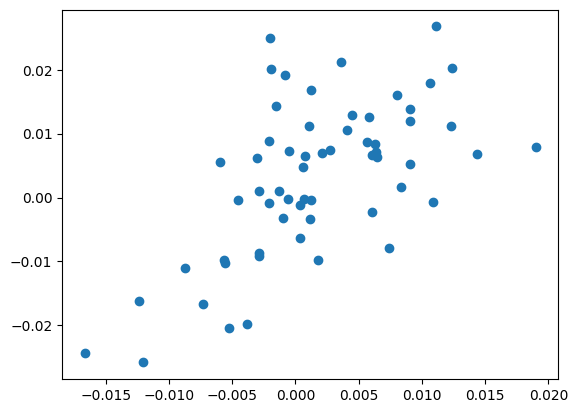

In [ ]:
sample = returns.sample(60)
plt.scatter(x=sample['SPY'], y=sample['GOOG']);

In [ ]:
reg = np.polyfit(sample['SPY'], sample['GOOG'], deg =1)
reg

array([1.08022746, 0.00138717])

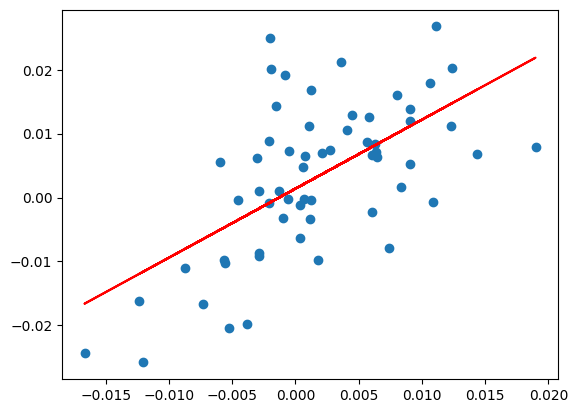

In [ ]:
trend = np.polyval(reg, sample['SPY'])
plt.scatter(x=sample['SPY'], y=sample['GOOG'])
plt.plot(sample['SPY'], trend, 'r')